# Importing libraries

In [1]:
import os
import pickle
import cv2
import random
from tqdm import tqdm
from tqdm.notebook import tnrange
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Path Directing of dataset

In [2]:
DATA_DIR = 'dataset'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'Valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'Test')

# Showing the categories

In [3]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['WithMask', 'WithoutMask']


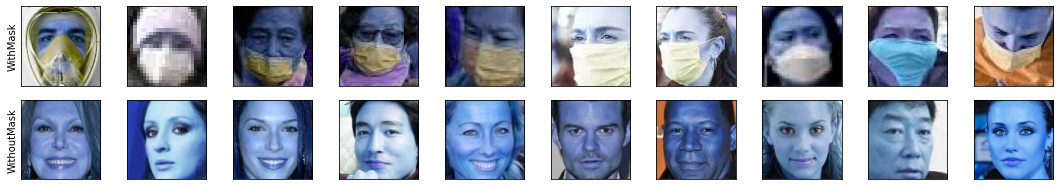

In [4]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(3,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

# Load training data

In [5]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 396.89it/s]

10000


# Load validation data

In [6]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 419.14it/s]

800


# Load test data

In [7]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|███████████████████████████████████████████████████████████████████████████████| 509/509 [00:01<00:00, 407.12it/s]

992


# Shuffling data

In [8]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [9]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (10000, 227, 227, 3) Y_train= (10000,)


In [10]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (800, 227, 227, 3) Y_valid= (800,)


In [11]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (992, 227, 227, 3) Y_test= (992,)


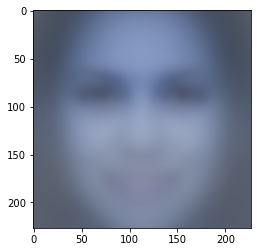

In [12]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [13]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

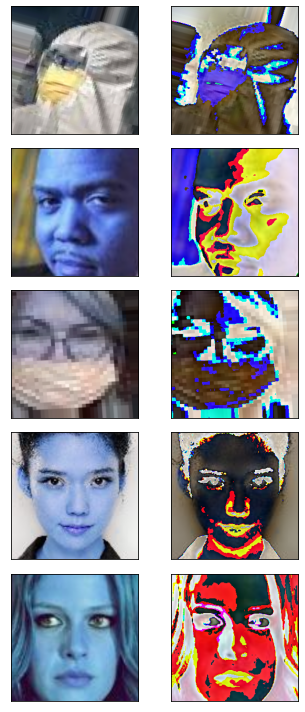

In [14]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [15]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    #Activation layers
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

# Compiling the model

In [16]:
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:

h = model.fit(x=X_train_norm, y=Y_train, epochs=5, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/5
313/313 [==============================] - 619s 2s/step - loss: 0.3436 - accuracy: 0.9186 - val_loss: 0.0995 - val_accuracy: 0.9638
Epoch 2/5
313/313 [==============================] - 616s 2s/step - loss: 0.1463 - accuracy: 0.9549 - val_loss: 0.0355 - val_accuracy: 0.9875
Epoch 3/5
313/313 [==============================] - 1006s 3s/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0404 - val_accuracy: 0.9850
Epoch 4/5
313/313 [==============================] - 586s 2s/step - loss: 0.0702 - accuracy: 0.9804 - val_loss: 0.0423 - val_accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 626s 2s/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0272 - val_accuracy: 0.9900


In [18]:
predictions = model.predict(X_test)

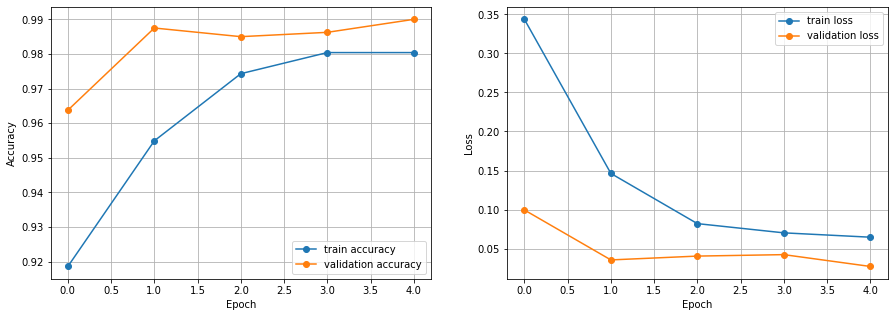

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

31/31 [==============================] - 16s 517ms/step - loss: 0.0726 - accuracy: 0.9808

Test Accuracy: 0.9808467626571655

Test Loss: 0.07256048917770386


In [25]:
import cv2
import numpy as np
# Load the cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# defines a video capture object
vid = cv2.VideoCapture(0)

try:
    while(True):
        # Captures the video frame by frame
        ret, frame = vid.read()

        # Converts to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detects the faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 2)
        
        
        # Draws the rectangle around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
            #Predicts
            temp = frame[y:y+h, x:x+w]
            temp = cv2.resize(temp, (227,227))
            pr = model.predict(temp.reshape(-1,227,227, 3))
            
            pr = np.argmax(pr)

            
            if(pr == 1):
                cv2.putText(frame, 
                        "Without_Mask", 
                        (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        .5, 
                        (0, 0, 255), 
                        2, 
                        cv2.LINE_4)
            else:
                cv2.putText(frame, 
                        "With_Mask", 
                        (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        .5, 
                        (0, 255, 0), 
                        2, 
                        cv2.LINE_4)
            
        # Display the resulting frame
        cv2.imshow('frame', frame)
        
        # the 'q' button is set as the quitting button you may use any

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # After the loop release the cap object
    vid.release()
    # Destroy all the windows
    cv2.destroyAllWindows()
except:
    print("Something went wrong")
    # After the loop release the cap object
    vid.release()
    # Destroy all the windows
    cv2.destroyAllWindows()